# KNN

(125973, 122) (125973,) (22544, 122) (22544,)
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

this is my models accuracy :0.7432576295244855
KNN confusion matrix using brute:

tn:9627
fp:97
fn:1501
tp:5657

The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them 
my f1 score on test:  0.5128323735408885
my accuracy score on test:  0.7432576295244855


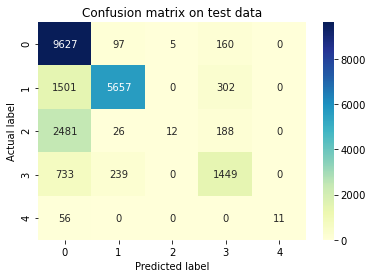

In [5]:

from sklearn import metrics #for confusion matrix
from joblib import load

from sklearn.model_selection import cross_val_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer, accuracy_score

X_tr = load('X_tr.joblib') 
y_tr = load('y_tr.joblib')
X_test = load('X_test.joblib')
y_test = load('y_test.joblib')

print(X_tr.shape,y_tr.shape,X_test.shape,y_test.shape)
model_1=load("KNN.joblib")
print(model_1.best_params_)

y_pred=model_1.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("KNN confusion matrix using brute:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)

# Naive Nayes

['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty_level', 'land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'ser

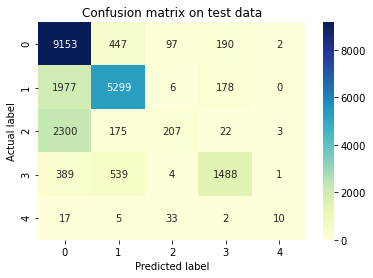

In [9]:
#now we apply standard scaling to make features look like gaussian

from joblib import dump, load
X_tr = load('X_tr.joblib') 
y_tr = load('y_tr.joblib')
X_test = load('X_test.joblib')
y_test = load('y_test.joblib')

print(list(X_tr.columns))
print(X_tr.shape,y_tr.shape,X_test.shape,y_test.shape)
priors=list(y_tr.value_counts())



numerical_features_train=X_tr.iloc[:,:27]
print(numerical_features_train.shape)
categorical_features_train=X_tr.iloc[:,27:27+11]
print(categorical_features_train.shape)
one_hot_encoded_features_train=X_tr.iloc[:,27+11:]
print(one_hot_encoded_features_train.shape)

numerical_features_test=X_test.iloc[:,:27]
print(numerical_features_test.shape)
categorical_features_test=X_test.iloc[:,27:27+11]
print(categorical_features_test.shape)
one_hot_encoded_features_test=X_test.iloc[:,27+11:]
print(one_hot_encoded_features_test.shape)

#no standardization required for decision trees

import pandas as pd
import numpy as np

train_df=np.hstack([numerical_features_train,categorical_features_train,one_hot_encoded_features_train])
test_df=np.hstack([numerical_features_test,categorical_features_test,one_hot_encoded_features_test])

print(train_df.shape,y_tr.shape,y_test.shape,test_df.shape)

from sklearn.preprocessing import StandardScaler
scale=StandardScaler() #we will later use this function to transform the testing data to the same scale

# Scaling down both train and test data set
#https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models
print(scale.fit(numerical_features_train))
num_features_train_std=scale.fit_transform(numerical_features_train)

#transformingthe testing data so that it has the same mean and variance as we applied in train
num_features_test_std=scale.fit_transform(numerical_features_test)


print(numerical_features_train.shape,numerical_features_test.shape)

import pandas as pd
import numpy as np

train_df=np.hstack([num_features_train_std,categorical_features_train,one_hot_encoded_features_train])
test_df=np.hstack([num_features_test_std,categorical_features_test,one_hot_encoded_features_test])

from joblib import load
model_1=load("Naivebayes.joblib")
print(model_1.best_params_)
y_pred=model_1.predict(test_df)
y_pred_1=model_1.predict_proba(test_df)
# For class probabilities we can print the labels using precit_proba. Highest probability would be an attack.
print(y_pred_1[1000])
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("GNB confusion matrix:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)

In [2]:
from joblib import load
model_1=load("Naivebayes.joblib")
print(model_1.get_params)

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [0.1, 0.2, 0.30000000000000004, 0.4,
                                           0.5, 0.6000000000000001,
                                           0.7000000000000001, 0.8, 0.9, 1.0,
                                           1.1, 1.2000000000000002, 1.3,
                                           1.4000000000000001, 1.5, 1.6,
                                           1.7000000000000002, 1.8,
                                           1.9000000000000001, 2.0, 2.1, 2.2,
                                           2.3000000000000003,
                                           2.4000000000000004, 2.5, 2.6, 2.7,
                                           2.8000000000000003,
                                           2.9000000000000004, 3.0, ...]},
             scoring=make_scorer(f1_score, average=macro), verbose=10)>


In [3]:
model_1=load("Naivebayes.joblib")
print(model_1.best_params_)

{'var_smoothing': 1.0}


# Logistic Regression


this is my models accuracy :0.7654808374733854
Logistic Regression confusion matrix:

tn:8987
fp:476
fn:1655
tp:5696

The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them 
my f1 score on test:  0.5746303705582378
my accuracy score on test:  0.7654808374733854


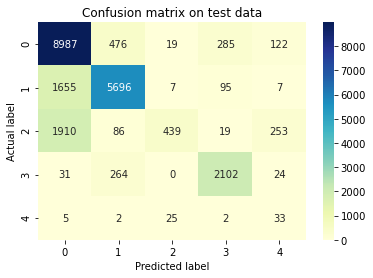

In [7]:
from joblib import load
model_1=load("logistic_regression_final.joblib")
y_pred=model_1.predict(test_df)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("Logistic Regression confusion matrix:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)

In [9]:
model_1=load("logistic_regression_final.joblib")
print(model_1.get_params)

<bound method BaseEstimator.get_params of LogisticRegression(C=12.742749857031322, class_weight='balanced', l1_ratio=0.1,
                   random_state=0, solver='saga')>


# Support Vector Machines

{'C': 100.0, 'kernel': 'rbf'}

this is my models accuracy :0.6345369056068133
SVM confusion matrix:

tn:9551
fp:82
fn:1208
tp:3100

The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them 
my f1 score on test:  0.40133153202141053
my accuracy score on test:  0.6345369056068133


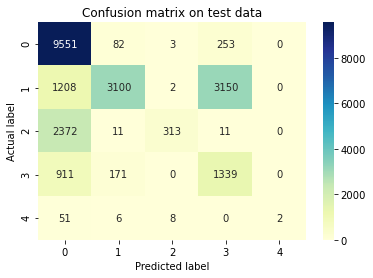

In [15]:
from joblib import load
model_1=load("svm.joblib")
print(model_1.best_params_)
y_pred=model_1.predict(test_df)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("SVM confusion matrix:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)

In [12]:
from joblib import load
model_1=load("svm.joblib")
print(model_1.get_params)

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring=make_scorer(f1_score, average=macro), verbose=10)>


In [13]:
model_1=load("svm.joblib")
print(model_1.best_params_)

{'C': 100.0, 'kernel': 'rbf'}


# Decision Trees

['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty_level', 'land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'ser

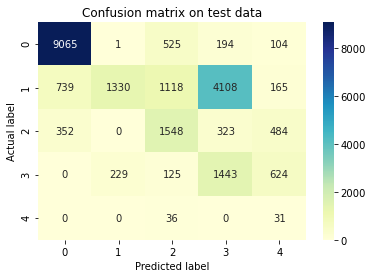

In [7]:

from sklearn import metrics #for confusion matrix
from joblib import load

from sklearn.model_selection import cross_val_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer, accuracy_score

from joblib import dump, load
X_tr = load('X_tr.joblib') 
y_tr = load('y_tr.joblib')
X_test = load('X_test.joblib')
y_test = load('y_test.joblib')

print(list(X_tr.columns))
print(X_tr.shape,y_tr.shape,X_test.shape,y_test.shape)
priors=list(y_tr.value_counts())
eles=[]

for element in priors:
    prob=element/125973
    eles.append(prob)
print(eles)


numerical_features_train=X_tr.iloc[:,:27]
print(numerical_features_train.shape)
categorical_features_train=X_tr.iloc[:,27:27+11]
print(categorical_features_train.shape)
one_hot_encoded_features_train=X_tr.iloc[:,27+11:]
print(one_hot_encoded_features_train.shape)

numerical_features_test=X_test.iloc[:,:27]
print(numerical_features_test.shape)
categorical_features_test=X_test.iloc[:,27:27+11]
print(categorical_features_test.shape)
one_hot_encoded_features_test=X_test.iloc[:,27+11:]
print(one_hot_encoded_features_test.shape)

#no standardization required for decision trees

import pandas as pd
import numpy as np

train_df=np.hstack([numerical_features_train,categorical_features_train,one_hot_encoded_features_train])
test_df=np.hstack([numerical_features_test,categorical_features_test,one_hot_encoded_features_test])

print(train_df.shape,y_tr.shape,y_test.shape,test_df.shape)
#assign train and test 
X_tr=train_df
X_test=test_df

from joblib import load
model_1=load("DT.joblib")
print(model_1.best_params_)
y_pred=model_1.predict(test_df)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("Decision Trees confusion matrix:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)

In [15]:
from joblib import load
model_1=load("DT.joblib")
print(model_1.get_params)

<bound method BaseEstimator.get_params of GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_features=122,
                                              random_state=1),
             n_jobs=-1, param_grid={'max_depth': [2, 3]},
             scoring=make_scorer(f1_score, average=macro), verbose=10)>


In [17]:
model_1=load("DT.joblib")
print(model_1.best_params_)

{'max_depth': 3}


# Random Forest

<class 'sklearn.model_selection._search.GridSearchCV'>
GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'n_estimators': [150, 160, 170, 180, 190, 200, 210,
                                          220, 230, 240, 250, 260, 270, 280,
                                          290, 300, 310, 320, 330, 340, 350,
                                          360, 370, 380, 390, 400, 410, 420,
                                          430, 440, ...]},
             scoring=make_scorer(f1_score, average=macro), verbose=10)
<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'n_estimators': [150, 160, 170, 180, 190, 200, 210,
                                          220, 230, 240, 250, 260, 270, 

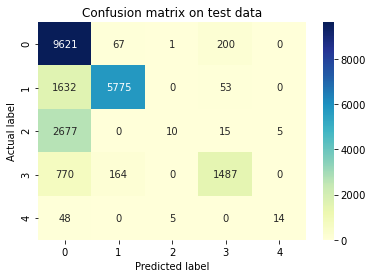

In [3]:
#random forest
model_1=load("randomforest.joblib")
print(type(model_1))
print(model_1)
print(model_1.get_params)
y_pred=model_1.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("Randome Forest confusion matrix:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)

In [18]:
from joblib import load
model_1=load("randomforest.joblib")
print(model_1.get_params)

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'n_estimators': [150, 160, 170, 180, 190, 200, 210,
                                          220, 230, 240, 250, 260, 270, 280,
                                          290, 300, 310, 320, 330, 340, 350,
                                          360, 370, 380, 390, 400, 410, 420,
                                          430, 440, ...]},
             scoring=make_scorer(f1_score, average=macro), verbose=10)>


In [19]:
model_1=load("randomforest.joblib")
print(model_1.best_params_)

{'class_weight': 'balanced_subsample', 'n_estimators': 460}


# XG Boost

<class 'xgboost.sklearn.XGBClassifier'>
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              

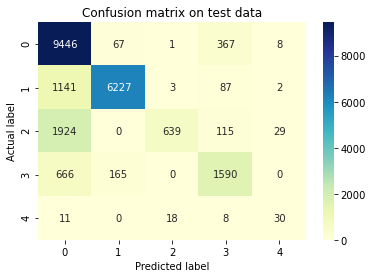

In [4]:
model_1=load("xgb.joblib")
print(type(model_1))
print(model_1)
print(model_1.get_params)
y_pred=model_1.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("XG Boost Confusion Matrix:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)

# CAT Boost

# CAT Boost supports categorical features and above we used X_test,y_test,X_train and y_train to laod the joblib file but these files couldn't be work here. As these train and test files are saved in an array which doesn't support categorical values.

In [15]:
!pip install catboost

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Loading training set into dataframe
df = pd.read_csv('./KDDTrain+.txt', header=None)
print(df.shape)
#Loading testing set into dataframe query points
qp = pd.read_csv('./KDDTest+.txt', header=None)
print(qp.shape)
#Reset column names for training set
#obtained by domain knowledge
#present in the arff file
df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
df.head()
#Reset column names for testing set
#obtained by domain knowledge
qp.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
qp.head()
#check for NAN values
print(df.isnull().values.any())
print(qp.isnull().values.any())
#combining the two data
combined_data = pd.concat([df,qp])
combined_data.shape
#these are all the attack categories
# Here we are printing the label column which is denoted from the subclass in the data.
# Also printing the unique values only with the help of unique function.
print(combined_data['subclass'].unique())
#Dropping subclass column for training set
y = combined_data.pop('subclass') #these are basically the labels
#let's now check the shape
combined_data.shape
#datafile_2 
#classifying broadly the attack types into roughly 3 categories

#Fixing labels for training set
classlist = []
category_1 = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
category_2 = ("ipsweep","mscan","nmap","portsweep","saint","satan")
category_3 = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
category_4 = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

for item in y:
    if item in category_1:
        classlist.append("DoS") #because category 1 denotes dos
    elif item in category_2:
        classlist.append("Probe") #category 2 denotes probe type 
    elif item in category_3:
        classlist.append("U2R") #this is some third type
    elif item in category_4:
        classlist.append("R2L")#fourth type
    else:
        classlist.append("Normal")#finally the majority points
        
#once we have generated the cheklist we wanna add this to the original data frame
#these now the data should have only 5 categories
combined_data["Class"] = classlist
#let's now check the shape
combined_data.shape

#print columns now
print("subclass" in list( combined_data.columns)) #subclass is absent
print("Class" in list( combined_data.columns)) #class is present
from sklearn.utils import class_weight
cw = list(class_weight.compute_class_weight('balanced',
                                             np.unique(combined_data['Class']),
                                             combined_data['Class']))
print(cw)

#these are all the attack categories
print(combined_data['Class'].unique())

print(list(combined_data.columns))
print(combined_data.shape)

x=combined_data.iloc[:,:43]
y=combined_data.iloc[:,-1]

def label_encoding(x):
    mapping_dict={'Normal':0, 'DoS':1, 'R2L':2, 'Probe':3, 'U2R':4}
    return mapping_dict[x]

combined_data["Class"]=combined_data["Class"].map(label_encoding)

print(x.shape,y.shape)

#select which to choose between scaing and standardization
#just select all the columns with numerical entries
import matplotlib.pyplot as plt
t_combined_data=combined_data.select_dtypes(include=[np.float64,np.int64])

print(combined_data.shape,t_combined_data.shape)

x=t_combined_data.iloc[:,:43]
y=t_combined_data.iloc[:,-1]

combined_data.pop('num_outbound_cmds')

x=combined_data.iloc[:,:42]
y=combined_data.iloc[:,-1]
x.pop("Class")
print(x.shape)

x=combined_data.iloc[:,:42]
y=combined_data.iloc[:,-1]
x.pop("Class")
print(x.shape)

categorical_string=['protocol_type', 'service', 'flag']

#numerical_features
possible_numerical=['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 
                    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 
                    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
                    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty_level',
                    'num_failed_logins','urgent','wrong_fragment','num_shells', 'num_access_files']

#categorical features
possible_categorical=['land', 'logged_in', 'root_shell',
    'su_attempted', 'is_host_login', 'is_guest_login']


#look up table
element_count={}

for element in combined_data:
    element_count[element]=combined_data[element].nunique()

print(element_count)
print(len(element_count))

categorical_feat=categorical_string+possible_categorical
print(len(categorical_feat))



(125973, 43)
(22544, 43)
False
False
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl' 'saint' 'mscan' 'apache2' 'snmpgetattack'
 'processtable' 'httptunnel' 'ps' 'snmpguess' 'mailbomb' 'named'
 'sendmail' 'xterm' 'worm' 'xlock' 'xsnoop' 'sqlattack' 'udpstorm']
False
True
[0.556378893738176, 0.38459964781437744, 2.1100660652127585, 8.023608860075635, 249.60840336134453]
['Normal' 'DoS' 'R2L' 'Probe' 'U2R']
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=['DoS' 'Normal' 'Probe' 'R2L' 'U2R'], y=0        Normal
1        Normal
2           DoS
3        Normal
4        Normal
          ...  
22539    Normal
22540    Normal
22541       DoS
22542    Normal
22543     Probe
Name: Class, Length: 148517, dtype: object as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


(148517, 43) (148517,)
(148517, 43) (148517, 40)
(148517, 41)
(148517, 41)
{'duration': 3424, 'protocol_type': 3, 'service': 70, 'flag': 11, 'src_bytes': 3601, 'dst_bytes': 10401, 'land': 2, 'wrong_fragment': 3, 'urgent': 4, 'hot': 29, 'num_failed_logins': 6, 'logged_in': 2, 'num_compromised': 96, 'root_shell': 2, 'su_attempted': 3, 'num_root': 91, 'num_file_creations': 36, 'num_shells': 4, 'num_access_files': 10, 'is_host_login': 2, 'is_guest_login': 2, 'count': 512, 'srv_count': 512, 'serror_rate': 99, 'srv_serror_rate': 94, 'rerror_rate': 98, 'srv_rerror_rate': 95, 'same_srv_rate': 101, 'diff_srv_rate': 101, 'srv_diff_host_rate': 87, 'dst_host_count': 256, 'dst_host_srv_count': 256, 'dst_host_same_srv_rate': 101, 'dst_host_diff_srv_rate': 101, 'dst_host_same_src_port_rate': 101, 'dst_host_srv_diff_host_rate': 75, 'dst_host_serror_rate': 101, 'dst_host_srv_serror_rate': 101, 'dst_host_rerror_rate': 101, 'dst_host_srv_rerror_rate': 101, 'difficulty_level': 22, 'Class': 5}
42
9


In [11]:
X_tr=x.iloc[:125973]
y_tr=y[:125973]
X_test=x.iloc[125973:]
y_test=y[125973:]
print(X_tr.shape,y_tr.shape,X_test.shape,y_test.shape)

(125973, 41) (125973,) (22544, 41) (22544,)


Learning rate set to 0.10126
0:	learn: 1.2555715	total: 369ms	remaining: 6m 8s
10:	learn: 0.3281962	total: 2.55s	remaining: 3m 49s
20:	learn: 0.1313669	total: 4.74s	remaining: 3m 40s
30:	learn: 0.0622841	total: 6.96s	remaining: 3m 37s
40:	learn: 0.0325908	total: 9.12s	remaining: 3m 33s
50:	learn: 0.0210994	total: 11.4s	remaining: 3m 32s
60:	learn: 0.0152976	total: 13.8s	remaining: 3m 32s
70:	learn: 0.0122220	total: 16.1s	remaining: 3m 30s
80:	learn: 0.0102243	total: 18.6s	remaining: 3m 30s
90:	learn: 0.0089381	total: 20.9s	remaining: 3m 28s
100:	learn: 0.0077557	total: 23.3s	remaining: 3m 27s
110:	learn: 0.0067474	total: 25.7s	remaining: 3m 25s
120:	learn: 0.0061910	total: 28.1s	remaining: 3m 23s
130:	learn: 0.0056704	total: 30.5s	remaining: 3m 22s
140:	learn: 0.0053049	total: 32.9s	remaining: 3m 20s
150:	learn: 0.0047481	total: 35.4s	remaining: 3m 18s
160:	learn: 0.0044155	total: 37.9s	remaining: 3m 17s
170:	learn: 0.0042134	total: 40.3s	remaining: 3m 15s
180:	learn: 0.0039577	total: 

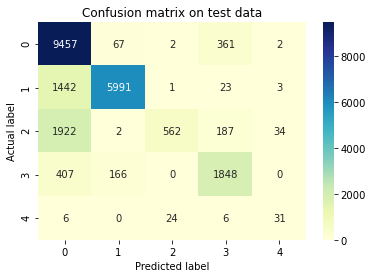

In [12]:
###### catboost classifier
from sklearn import metrics #for confusion matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer, accuracy_score

from catboost import CatBoostClassifier
model=CatBoostClassifier()
model.fit(X_tr,y_tr,cat_features=categorical_feat,verbose=10)

y_pred=model.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("catboost confusion matrix using brute:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)

In [19]:
np.array(model.get_feature_importance(prettified=True))

array([['src_bytes', 19.50390509077058],
       ['service', 12.149847554687957],
       ['difficulty_level', 6.130253330175179],
       ['protocol_type', 6.0042803333410815],
       ['count', 5.84277343216461],
       ['dst_host_diff_srv_rate', 5.576692525385065],
       ['dst_host_srv_count', 4.442475309499176],
       ['dst_host_same_src_port_rate', 4.3821232628559486],
       ['dst_bytes', 3.8765368619596994],
       ['flag', 3.015785587412942],
       ['dst_host_same_srv_rate', 2.871254430311953],
       ['dst_host_rerror_rate', 2.8142074578287466],
       ['dst_host_serror_rate', 2.667172960609174],
       ['srv_count', 2.5917178355492188],
       ['dst_host_count', 2.1549126720618457],
       ['serror_rate', 2.0634210689993315],
       ['same_srv_rate', 1.969589249461923],
       ['diff_srv_rate', 1.7688423511550397],
       ['dst_host_srv_serror_rate', 1.7682061421391533],
       ['srv_serror_rate', 1.6305675065337446],
       ['dst_host_srv_diff_host_rate', 1.454072048924656],
